# **Predictive Analytics: USA House Price Prediction**

- **Author:** Fatwa Nurhidayat
- **Email:** fatwa.nrhdyt@gmail.com

# **Project Domain**

## **Background**
The real estate market serves as a critical cornerstone of a nation's economic stability and growth. Property valuations are determined by a complex interplay of multi-dimensional factors, ranging from physical attributes—such as the number of bedrooms, bathrooms, and total living area—to external variables like geographical location and structural condition.

Temporal elements, including the year of construction and recent renovation history, also play a significant role in determining a property's market value. Furthermore, premium features such as basement availability, aesthetic views, and waterfront proximity act as high-impact value drivers in the valuation process.

A study by **Yahya et al. (2021)** demonstrates that machine learning approaches in house price prediction are instrumental in mitigating market uncertainty and facilitating data-driven decision-making. Although the study was initially conducted in Penang, Malaysia, the methodology remains highly applicable to global urban property markets, which often share similarly complex pricing dynamics.

## **Problem Urgency**
- **Enhanced Pricing Accuracy:** Assisting potential buyers in strategic financial planning and ensuring fair market value assessments.
- **Strategic Investment Insights:** Empowering investors to identify high-yield locations and optimize property portfolios through data-driven analysis.
- **Informed Urban Planning:** Providing local authorities with predictive insights to optimize public service distribution and regional infrastructure development.

## **References**
Yahya, N., Zainuddin, N. M. M., Sjarif, N. N. A., & Azmi, N. F. M. (2021). Predictive Visual Analytics for Machine Learning Model in House Price Prediction: A Case Study. *Open International Journal of Informatics (OIJI)*, 9(1), 1–10. [http://eprints.utm.my/97493/1/NorhayatiYahya2021_PredictiveVisualAnalyticsforMachine.pdf](http://eprints.utm.my/97493/1/NorhayatiYahya2021_PredictiveVisualAnalyticsforMachine.pdf)

# **Business Understanding**

**Problem Statements**
1. **Valuation Complexity:** Real estate prices exhibit high variance driven by diverse factors such as structural attributes, physical condition, and geographical location. Potential buyers and investors often struggle to objectively assess whether a property's asking price aligns with its actual physical characteristics.
2. **Model Optimization:** Identifying a regression model capable of capturing the intricate and non-linear relationships between property features and market value remains a challenge, leading to suboptimal predictive insights.

**Goals**
1. **Decision Support:** Empowering prospective buyers and investors with a data-driven estimation tool to evaluate property values based on physical and locational features, thereby facilitating more informed and precise investment decisions.
2. **Predictive Excellence:** Systematically identifying and evaluating multiple regression algorithms to establish the most optimal model for high-precision house price forecasting based on available datasets.

**Solution Statements**<br>
To achieve the aforementioned goals, this project implements the following strategic technical phases:
- **Exploratory Data Analysis (EDA) & Data Mining:** Conducting deep visual exploration to uncover underlying patterns, correlations, and multi-dimensional relationships between property attributes and sales prices.
- **Advanced Modeling:** Building and benchmarking predictive models using **K-Nearest Neighbors (KNN)** and **XGBoost Regression** to handle both linear and complex non-linear data structures.
- **Rigorous Evaluation:** Assessing model performance utilizing the **R-squared (R²)** metric to ensure predictive reliability, precision, and alignment with business requirements.

# **Data Understanding**

## **Dataset Description**

The dataset utilized in this project provides comprehensive information regarding residential property sales in the United States. It encompasses various structural, temporal, and locational attributes that serve as critical predictors for real estate valuation.

---

### **Dataset Overview**
- **Total Features:** 18
- **Total Records:** 4,140
- **Data Source:** [Kaggle - USA House Prices](https://www.kaggle.com/datasets/fratzcan/usa-house-prices)

---

### **Data Dictionary**

| Feature | Description |
|---|---|
| `Date` | The transaction date, used for time-series trend analysis of property prices. |
| `Price` | The sale price in USD (Target Variable for prediction). |
| `Bedrooms` | Number of bedrooms; typically, higher counts correlate with higher property values. |
| `Bathrooms` | Number of bathrooms; a key factor influencing structural valuation. |
| `Sqft Living` | Total interior living space in square feet. |
| `Sqft Lot` | Total land area in square feet. |
| `Floors` | Number of floors/levels in the property. |
| `Waterfront` | Binary indicator (1 = Waterfront view, 0 = No waterfront view). |
| `View` | Quality index of the property's view (scale: 0 to 4). |
| `Condition` | Structural condition index (scale: 1 to 5). |
| `Sqft Above` | Interior housing area excluding the basement. |
| `Sqft Basement` | Total basement area; contributes to value based on functionality. |
| `Yr Built` | Year of original construction. |
| `Yr Renovated` | Year of the most recent renovation (impacts modern market appeal). |
| `Street` | Specific street address for granular location analysis. |
| `City` | The city where the property is located; accounts for localized market dynamics. |
| `Statezip` | Regional context provided through state and ZIP code combinations. |
| `Country` | Country of location (Focused on the United States for this dataset). |

---

### **Data Profiling & Exploratory Workflow**
To establish a solid foundation for predictive modeling, the following analytical steps were performed:
- **Data Ingestion:** Loading and initial inspection of the raw dataset.
- **Data Quality Assessment:** Identifying anomalies, including missing values, duplicate records, and statistical outliers.
- **Univariate Analysis:** Utilizing histograms to visualize the statistical distribution of the target variable (`Price`) and key numerical features (`Bedrooms`, `Bathrooms`, `Sqft Living`).
- **Bivariate & Multivariate Analysis:** Constructing a correlation heatmap to identify multi-collinearity and the strength of relationships between independent variables and the target price.

## **Data Ingestion**

In [ ]:
# library importation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# local dataset loading
hprices = pd.read_csv('/Users/wafanur/submission_dicoding/submission_mlt_1/USA Housing Dataset.csv')

# data preview
hprices

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
# dataset information
hprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [ ]:
# descriptive statistics
display(hprices.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


**Insights:**
- **Price Analysis:** Property prices range from **$0 to $26.59 million**, with a mean of approximately **$553k**. The minimum value of **$0** is statistically anomalous and likely represents data entry errors or missing records. The median price (Q2) of **$460k** confirms a **right-skewed distribution**, where high-value outliers significantly pull the mean upward.
- **Bedroom Count:** Values range from 0 to 8, with an average of 3.4. Entries with **0 bedrooms** are flagged as potential data anomalies. Most properties in the dataset feature 3 to 4 bedrooms.
- **Bathroom Count:** The average is **2.16**, with a maximum of 6.75. The presence of decimal values (e.g., 1.5) reflects standard real estate notation for partial bathrooms (e.g., a full bath plus a powder room).
- **Living Area (`sqft_living`):** Featuring a median of 1,980 sqft and a maximum of 10,040 sqft, the distribution is right-skewed, indicating the presence of several luxury properties with exceptionally large living spaces.
- **Land Area (`sqft_lot`):** This feature exhibits extreme variance (std dev: 35,876), with a maximum of **1 million sqft**. This suggests a diverse portfolio ranging from standard residential lots to massive estates or agricultural lands.
- **Floor Distribution:** Properties average 1.5 floors, with a maximum of 3.5. The majority of the inventory consists of 1 to 2-story residences.
- **Waterfront Exclusivity:** Waterfront properties are rare, accounting for **less than 1%** of the total dataset (mean = 0.007), highlighting their status as premium niche assets.
- **View Quality:** Most properties lack a premium view, as evidenced by a low mean score of 0.25 on a scale of 0 to 4.
- **Structural Condition:** An average score of **3.45 (scale 1–5)** suggests that the properties are generally in good condition, with a small minority occupying the extremes of the scale.
- **Basement Analysis:** The proximity of `sqft_above` values to `sqft_living` totals indicates that most properties do not have basements, further confirmed by a **median `sqft_basement` of 0**.
- **Historical Context (`yr_built`):** Construction years range from 1900 to 2014, with an average year of **1970**. The Interquartile Range (IQR) shows that the bulk of the housing stock was built between 1951 and 1997.
- **Renovation Status:** The high frequency of zero values (median = 0) confirms that the majority of properties have **no recorded renovation history**, indicating either original condition or unlogged upgrades.

## **Data Integrity**

### **Missing Values Check**

In [ ]:
hprices.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### **Duplicate Detection**

In [ ]:
hprices.duplicated().sum()

0

### **Statistical Outlier Profiling**

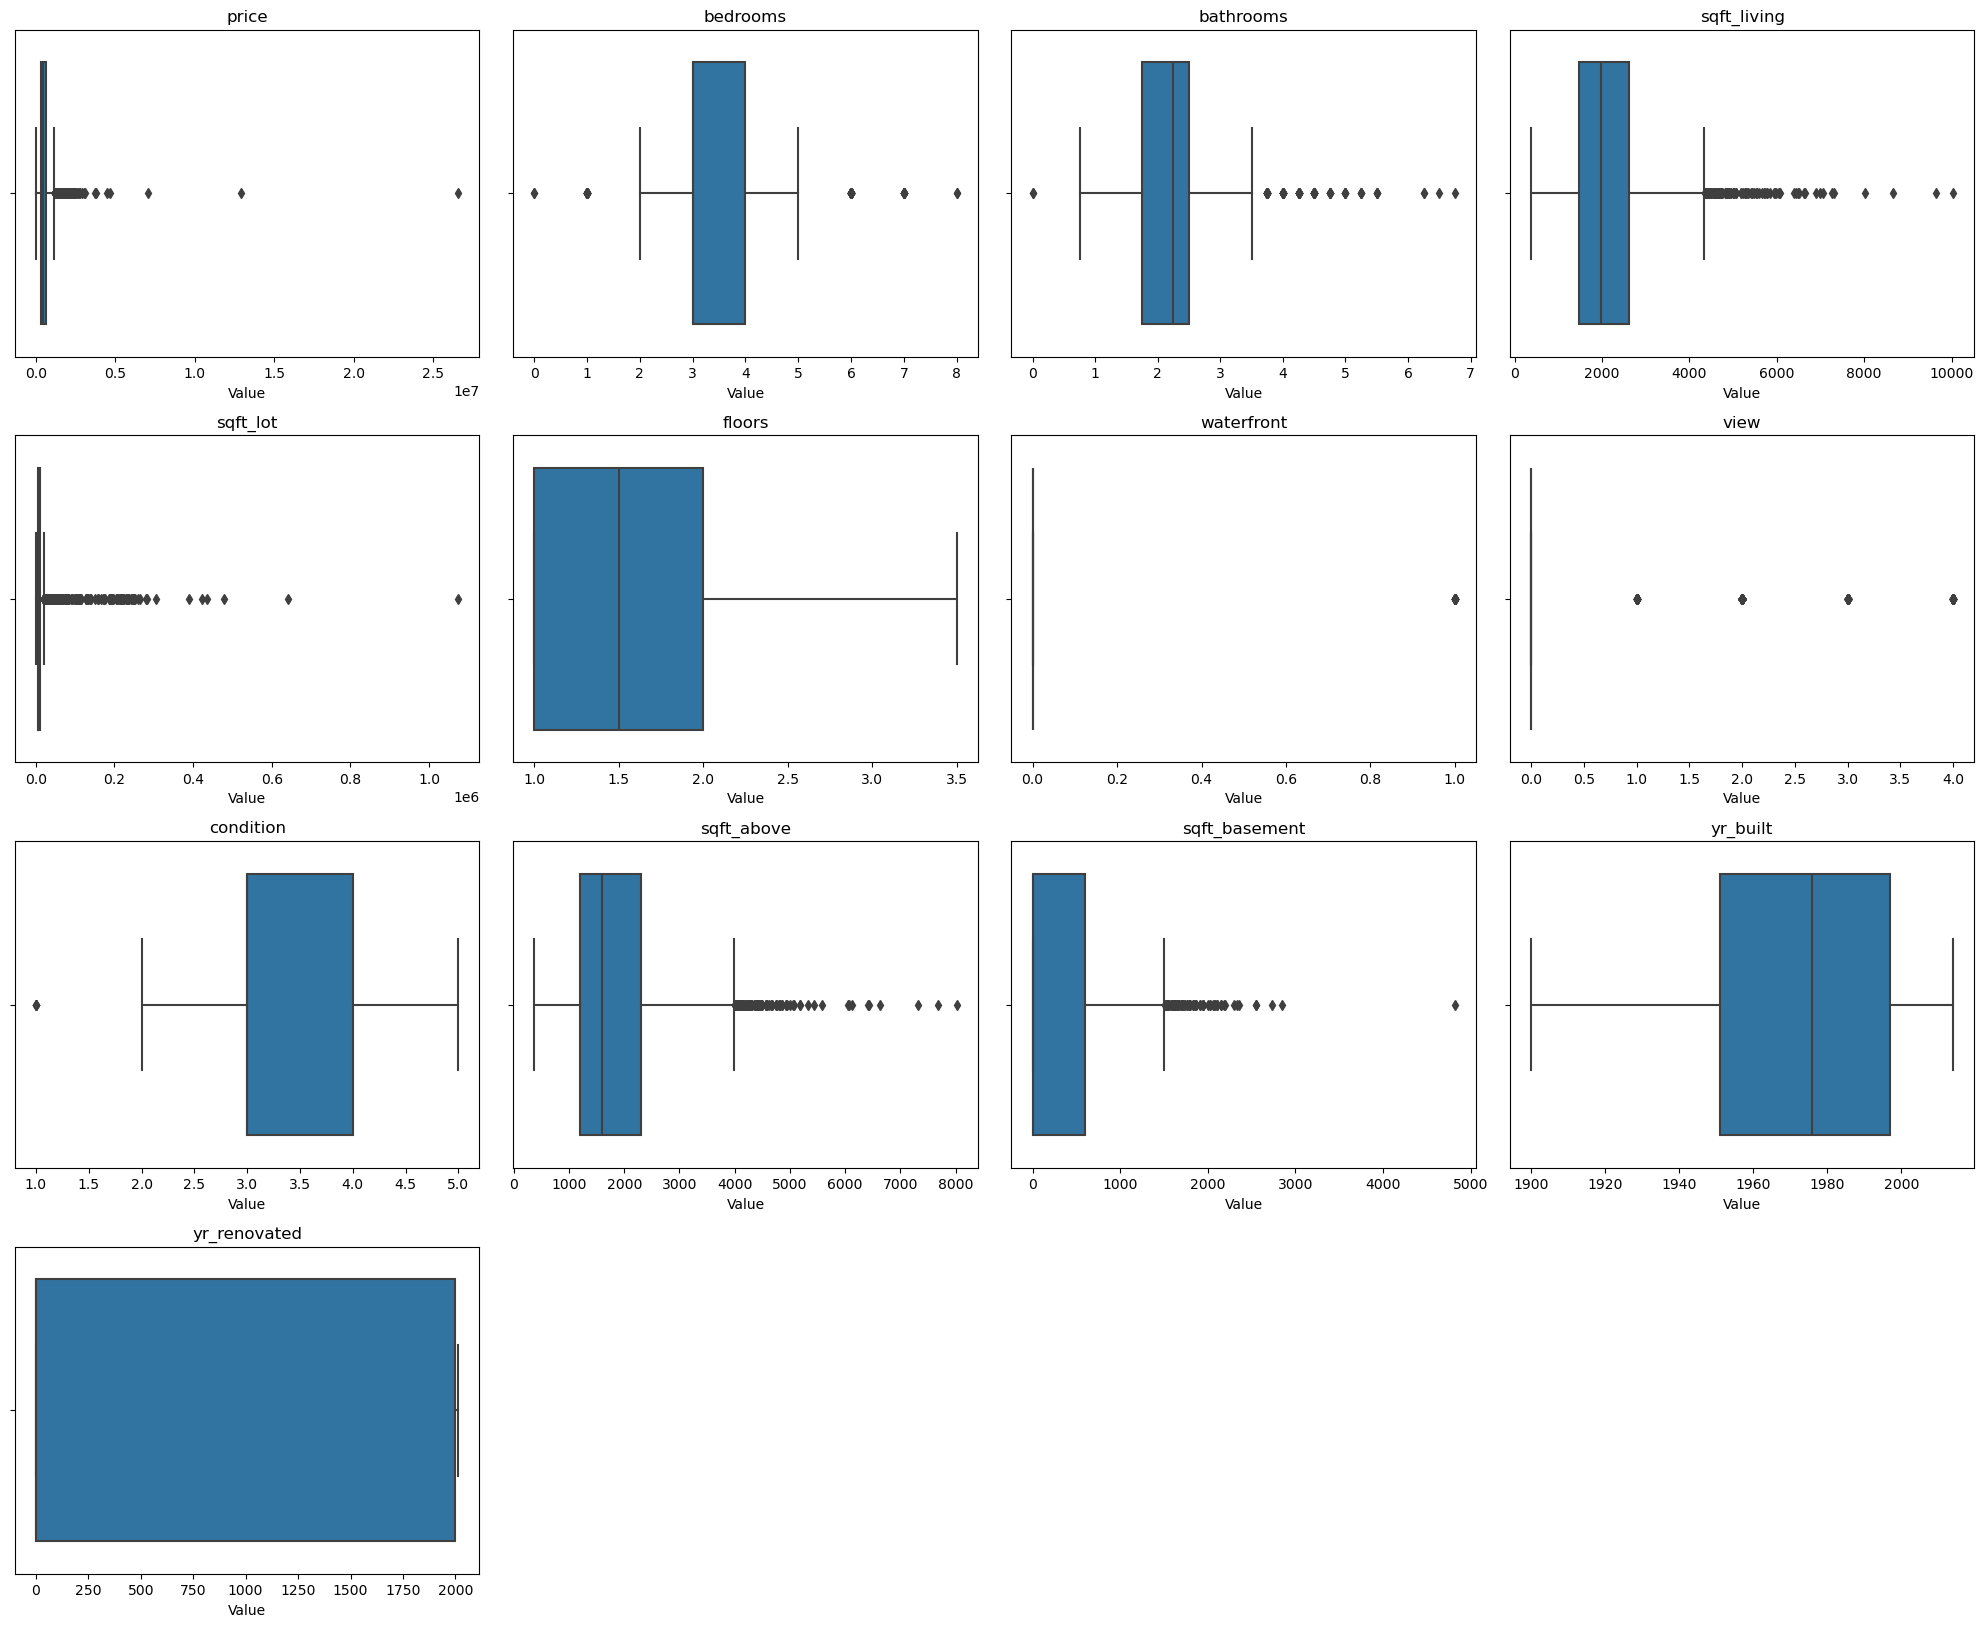

In [ ]:
num_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
            'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

num_vars = hprices.shape[1]
n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(num_cols):
    sns.boxplot(x=hprices[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Insights:**
- **Price:** Exhibits significant positive skewness due to the presence of high-magnitude extreme values.
- **Structural Space (`sqft_living`, `sqft_above`, `sqft_basement`):** These features show a distinct right-skewed distribution, indicating a concentration of standard-sized homes with a few exceptionally large properties.
- **Lot Size (`sqft_lot`):** Contains a substantial number of extreme statistical outliers, suggesting high variance in land dimensions.
- **Room Counts (`bedrooms`, `bathrooms`):** Presence of structural outliers that deviate from typical residential norms (e.g., unusually high or low room counts).

## **Numerical Feature Visualization**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

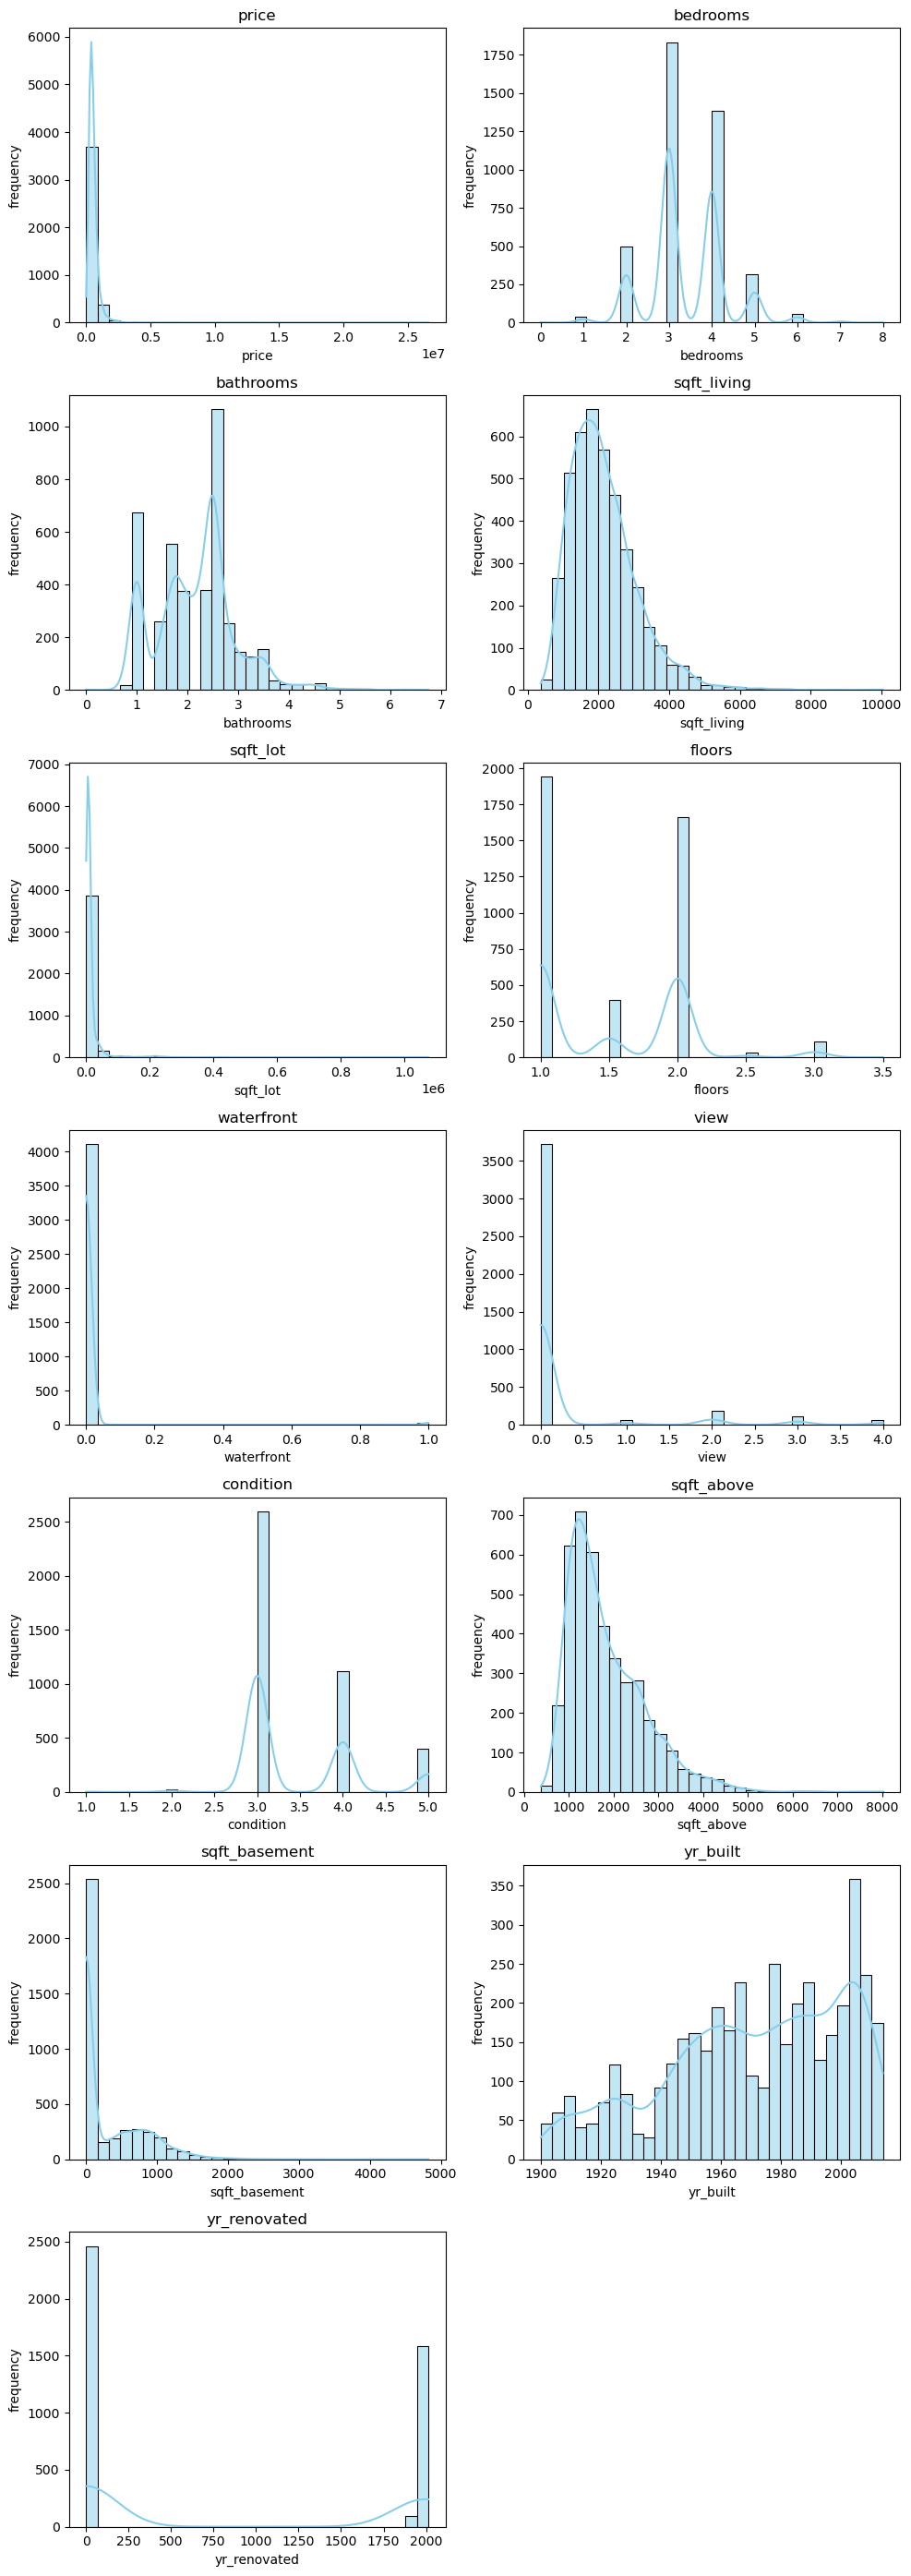

In [ ]:
# configure plotting grid dimensions
n_cols = 2
n_rows = (len(num_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# iterative histogram generation for univariate distribution analysis
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(hprices[col], kde=True, color='skyblue', bins=30)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('frequency')

plt.tight_layout()
plt.show()

## **Correlation Heatmap Analysis**

In [ ]:
corr_matrix = hprices[num_cols].corr()
print(corr_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.188765   0.317785     0.418528  0.045964  0.143180   
bedrooms       0.188765  1.000000   0.542549     0.590110  0.065747  0.178908   
bathrooms      0.317785  0.542549   1.000000     0.760353  0.097497  0.487462   
sqft_living    0.418528  0.590110   0.760353     1.000000  0.194226  0.345130   
sqft_lot       0.045964  0.065747   0.097497     0.194226  1.000000 -0.001113   
floors         0.143180  0.178908   0.487462     0.345130 -0.001113  1.000000   
waterfront     0.131401 -0.001286   0.080152     0.126157  0.019229  0.021278   
view           0.217553  0.105512   0.210590     0.308098  0.071264  0.030604   
condition      0.030327  0.016503  -0.123024    -0.069315  0.012016 -0.275212   
sqft_above     0.355214  0.478124   0.687679     0.874881  0.203190  0.524777   
sqft_basement  0.204066  0.329862   0.292170     0.439053  0.023567 -0.261826   
yr_built       0.027067  0.1

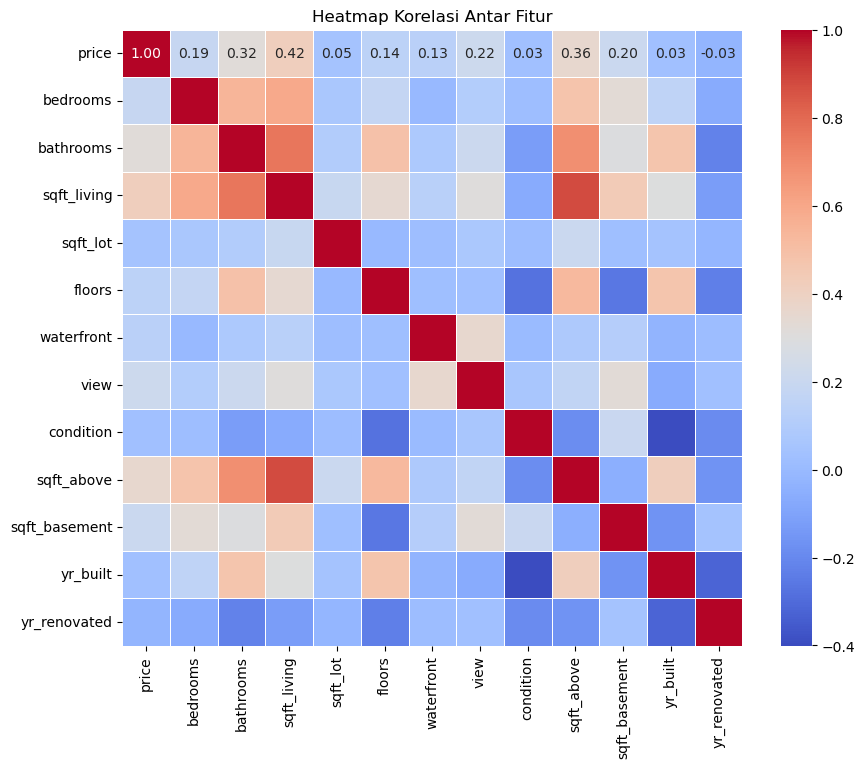

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

**Insights:**
- **Primary Price Driver:** `sqft_living` emerges as the most influential feature relative to `price` (correlation: 0.42), confirming that total interior living space is the dominant factor in property valuation.
- **Significant Predictors:** Both `sqft_above` (0.36) and `bathrooms` (0.32) demonstrate meaningful positive correlations with market value.
- **Weaker Relationships:** Interestingly, `bedrooms` shows a lower correlation of 0.19, suggesting that the number of bedrooms is a less critical predictor of price compared to total square footage.
- **Negligible Correlation:** `sqft_lot` shows nearly zero correlation with `price` (0.05), indicating that land size is not a primary value driver in this specific market segment. (*Note: Outliers for this feature will remain untreated as the column is slated for removal during the feature selection phase*).
- **Temporal & Qualitative Factors:** Features such as `condition`, `yr_built`, and `yr_renovated` exhibit very weak linear relationships with price, suggesting that age and condition are less impactful predictors within this specific dataset.
- **Multicollinearity Assessment:** Strong multicollinearity is observed between `sqft_living` and `sqft_above` (0.87), as well as `bathrooms` (0.76). This is logically consistent, as larger residences typically feature more rooms and higher-tier amenities.

# **Data Preparation**

Based on the insights gained from the Exploratory Data Analysis (EDA) phase, several critical preprocessing steps are executed to ensure data quality before model training:

- **Outlier Remediation:** Mitigating the influence of anomalous data points to prevent distortion of model parameters and evaluation metrics.
- **Feature Selection & Dimensionality Reduction:** Removing irrelevant or redundant columns to minimize computational overhead and prevent potential training errors.
- **Dataset Splitting:** Partitioning the data into Training and Testing sets (80/20) to ensure an objective evaluation and monitor for potential overfitting.
- **Data Standardization (Standard Scaling):** Normalizing the scale of numerical features to ensure distance-based and gradient-based algorithms (such as KNN and XGBoost) perform optimally.

## **Outlier Management**

Managing statistical outliers is a critical phase in the data pipeline for the following strategic reasons:

1. **Preserving Model Predictive Accuracy**
Regression models are highly sensitive to extreme values. Outliers can disproportionately influence the loss function, leading to biased coefficients and inaccurate predictions.

2. **Preventing Statistical Distortion**
Extreme values can significantly skew descriptive statistics, such as the mean and standard deviation, as well as inflate or deflate correlation coefficients. Remedying these ensures the data remains representative.

3. **Optimizing Data Distribution**
Machine learning algorithms generally perform better when data distributions approach normality. Outliers often cause severe skewness; addressing them helps stabilize the variance.

4. **Enhancing Model Generalization**
By filtering out statistical noise and anomalies, the model focuses on learning the underlying patterns of the dataset. This leads to better performance on unseen data rather than just "memorizing" noise.

5. **Ensuring Data Integrity**
Outliers are frequently the result of data entry errors or sensor malfunctions rather than real-world phenomena. Removing these points ensures that the analysis is grounded in verified, realistic data.

### **price**

In [ ]:
# dropping price with value 0
print("Jumlah data sebelum:", len(hprices))
hprices = hprices[hprices['price'] > 0]
print("Jumlah data setelah:", len(hprices))

Jumlah data sebelum: 4140
Jumlah data setelah: 4091


In [ ]:
# log transform to handle outliers
import numpy as np
hprices['price'] = np.log1p(hprices['price'])

/var/folders/bk/8jjs__v10p30vy2gktd6wlq80000gn/T/ipykernel_20053/1522151900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hprices['price'] = np.log1p(hprices['price'])


### **bedrooms**

In [ ]:
# retaining bedroom counts within the range of 1-7 (to handle outliers)
hprices = hprices[(hprices['bedrooms'] > 0) & (hprices['bedrooms'] < 8)]

**Insights:**
- Upon inspection, houses without `bedrooms` are identified as data error outliers, as their prices are quite high and above average. Consequently, this data has been removed.

### **bathrooms**

In [ ]:
# retaining bathroom counts below 6 (to handle outliers)
hprices = hprices[(hprices['bathrooms'] < 6)]

### **sqft_living, sqft_above, sqft_basement**

In [ ]:
from scipy.stats.mstats import winsorize

# duplicate data to avoid overwriting
hprices_winsor = hprices.copy()

# winsorizing helper function
def apply_winsorize(df, col, limits=(0.01, 0.01)):
    # winsorize only works on arrays, so we convert the Series first
    winsorized_data = winsorize(df[col], limits=limits)
    df[col] = winsorized_data
    return df

# apply winsorizing to right-skewed columns
columns_to_winsor = ['sqft_living', 'sqft_above', 'sqft_basement']
for col in columns_to_winsor:
    hprices_winsor = apply_winsorize(hprices_winsor, col)


## **Feature Selection**

This phase is critical for the following reasons:
1. **Preventing Execution Errors:** Eliminating non-numeric data that would otherwise cause compatibility issues during model training.
2. **Optimizing Model Efficiency:** Removing irrelevant features reduces computational overhead during training and enhances predictive accuracy by eliminating noise.

In [ ]:
# dropping columns
hprices_winsor.drop(columns=['date'], inplace=True)
hprices_winsor.drop(columns=['street'], inplace=True)
hprices_winsor.drop(columns=['statezip'], inplace=True)
hprices_winsor.drop(columns=['country'], inplace=True)
hprices_winsor.drop(columns=['sqft_lot'],inplace=True)
hprices_winsor.drop(columns=['condition'],inplace=True)
hprices_winsor.drop(columns=['yr_built'],inplace=True)
hprices_winsor.drop(columns=['yr_renovated'],inplace=True)
hprices_winsor.drop(columns=['city'],inplace=True)

## **Data Splitting**

This phase is critical for the following reasons:
1. **Ensuring Objective Evaluation**
The model is evaluated on unseen data, ensuring that performance metrics accurately reflect its real-world predictive capabilities.

2. **Mitigating Overfitting**
Without a separate test set, a model might perform exceptionally well on training data but fail to generalize to new, unseen instances.

3. **Facilitating Model Tuning**
A dedicated test set allows for fair validation and a standardized comparison between different algorithms.

In [ ]:
# partitioning the dataset into training and testing sets
from sklearn.model_selection import train_test_split

y = hprices_winsor['price']
X = hprices_winsor.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Insights:**
- The implementation above partitions the dataset into:
    - 80% Training Data (X_train, y_train) → To train the model.
    - 20% Testing Data (X_test, y_test) → To evaluate model performance.

## **Standardization**

This phase is critical for the following reasons:
1. **Disparity in Feature Scales:** Features like `sqft_lot` may contain values in the tens of thousands, while others like `floors` only range from 1 to 3. Without scaling, models such as KNN can become biased toward features with larger numerical ranges.

2. **Algorithm Sensitivity to Scale and Distance:**
    - **K-Nearest Neighbors (KNN):** Relies on distance calculations between data points. Without standardization, features with higher magnitudes will disproportionately dominate the distance metric.
    - **XGBoost:** While decision-tree-based models are generally scale-invariant, standardization can still facilitate better performance and faster convergence when features exhibit vastly different distributions.

3. **Accelerating Training Convergence:** Standardization improves the stability and speed of the training process, particularly for optimization-based algorithms.

In [ ]:
# implementing standardization using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Modeling**

This project implements two distinct regression algorithms to benchmark and identify the most effective predictive architecture:
1. KNN Regression
2. XGBoost Regression

### **KNN Regression**

**KNN (K-Nearest Neighbors) Regression** is a proximity-based predictive method that estimates values based on the similarity (distance) between data points. This model is non-parametric, meaning it makes no underlying assumptions about the functional relationship between features and the target variable.



**Parameter:**
- `n_neighbors=8`: Utilizes the 8 nearest neighbors for prediction. Selecting a value that is too low may result in overfitting, while an excessively high value can lead to underfitting.

**Strengths:**
- Intuitive and mathematically straightforward.
- Highly effective for capturing complex, non-linear relationships.
- Lazy learner: Does not require an explicit training phase.

**Limitations:**
- Highly sensitive to feature scales (requires robust standardization).
- Computationally expensive during inference as it calculates distances to all points in the dataset.
- Performance degrades significantly in high-dimensional feature spaces.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

### **XGBoost Regression**

**XGBoost (Extreme Gradient Boosting)** is a highly efficient ensemble learning algorithm based on the gradient boosting framework. It is widely recognized for its speed and superior predictive performance in regression tasks.

**Parameters:**
- `n_estimators=100`: The number of boosting rounds (total number of decision trees).
- `learning_rate=0.1`: The step size shrinkage used to prevent overfitting.
- `max_depth=3`: The maximum depth allowed for each individual tree.

**Strengths:**
- Built-in regularization (L1 and L2) provides robust protection against overfitting.
- Exceptional at modeling complex non-linear interactions between features.
- High computational efficiency, optimized for large-scale datasets.
- Native capability to handle missing values automatically.

**Limitations:**
- High model complexity, often perceived as a "black box" regarding interpretability.
- Requires extensive hyperparameter tuning to achieve optimal results.
- Higher computational overhead compared to simpler linear models.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# grid configuration
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# optimal model selection
best_xgb = grid_search.best_estimator_

# inference execution
xgb_pred = best_xgb.predict(X_test)

print("Best Parameters:")
print(grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


# **Evaluation**

The primary evaluation metric utilized in this project is **R-squared (R²)**, also known as the coefficient of determination.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

### **R-squared (R²)**

R² quantifies the proportion of variance in the target variable (`price`) that can be explained by the input features within the model. It serves as a key indicator of the model's explanatory power.

**Formula:** \[
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\]

**Notation:**
- \( \bar{y} \): The mean of the actual observed values.
- **Numerator**: The Sum of Squared Residuals (the error generated by the model).
- **Denominator**: The Total Sum of Squares (the inherent variance within the data).

---

**Mechanism:** - The metric compares the total prediction error against the total variance of the target variable.
- A value approaching **1** indicates that the model is highly effective at explaining the variance in the dataset.

**Strengths:** - Provides a comprehensive overview of how well the independent variables explain the target.
- Acts as a standardized metric for holistic model evaluation.

**Interpretation:** - \( R^2 = 1 \): The model provides perfect predictions.
- \( R^2 = 0 \): The model's predictive capability is no better than simply using the mean of the data.
- \( R^2 < 0 \): The model is less effective than a horizontal line representing the mean (suggesting a poor fit).

In [ ]:
r2_knn = r2_score(y_test, knn_pred)
r2_xgb = r2_score(y_test, xgb_pred)

r2_df = pd.DataFrame({
    'Model': ['KNN', 'XGBoost'],
    'R² Score': [r2_knn, r2_xgb]
})

print("\nTabel R²:")
print(r2_df)


Tabel R²:
     Model  R² Score
0      KNN  0.835761
1  XGBoost  0.918668


**Insights:**
- Based on the model evaluation results, **XGBoost Regression** demonstrates superior performance with an **R² of 0.91**, significantly outperforming the **KNN** model which achieved an **R² of 0.83**.
- This result indicates that the XGBoost architecture is exceptionally capable of capturing the intricate and non-linear relationships between property characteristics and market prices. This high level of accuracy provides significant value for prospective buyers and investors in estimating property values that align precisely with specific physical features and geographical locations.